<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Decision-Trees" data-toc-modified-id="Decision-Trees-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Decision Trees</a></span><ul class="toc-item"><li><span><a href="#Training-and-Visualisation" data-toc-modified-id="Training-and-Visualisation-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Training and Visualisation</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Prediction</a></span></li><li><span><a href="#Estimating-Class-Probabilities" data-toc-modified-id="Estimating-Class-Probabilities-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Estimating Class Probabilities</a></span></li><li><span><a href="#CART-(Classification-and-Regression-Tree)" data-toc-modified-id="CART-(Classification-and-Regression-Tree)-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>CART (Classification and Regression Tree)</a></span></li><li><span><a href="#Computational-Complexity" data-toc-modified-id="Computational-Complexity-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Computational Complexity</a></span></li><li><span><a href="#Gini-Impurity-or-Entropy" data-toc-modified-id="Gini-Impurity-or-Entropy-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Gini Impurity or Entropy</a></span></li><li><span><a href="#Regularisation-hyperparameters" data-toc-modified-id="Regularisation-hyperparameters-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Regularisation hyperparameters</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-7.8"><span class="toc-item-num">7.8&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#Instability" data-toc-modified-id="Instability-7.9"><span class="toc-item-num">7.9&nbsp;&nbsp;</span>Instability</a></span></li></ul></li></ul></div>

# Decision Trees

In [23]:
import os
import numpy.random as rnd

## Training and Visualisation

In [24]:
# load iris dataset & train a DT classifier

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)


DecisionTreeClassifier(max_depth=2)

In [25]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

DecisionTreeClassifier(max_depth=2, min_impurity_split=1e-07)

In [26]:
# graph it into a .dot file
from sklearn.tree import export_graphviz

def image_path(fig_id):
    #return os.path...
    return fig_id

export_graphviz(
    tree_clf,
    out_file=image_path("iris_tree.dot"),
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [27]:
# convert to PDF or PNG using command-line tool.
! dot -Tpng iris_tree.dot -o iris_tree.png

/bin/bash: dot: command not found


## Prediction
* Deicision Trees don't require feature scaling or centering at all
* a node's gini attribute measures its impurity
* CART algorithm produces only binary trees - two children
* Other algorithm such as ID3 can produce Decisio Trees with nodes more than two childern

<ipython-input-28-c9472b106732>:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)


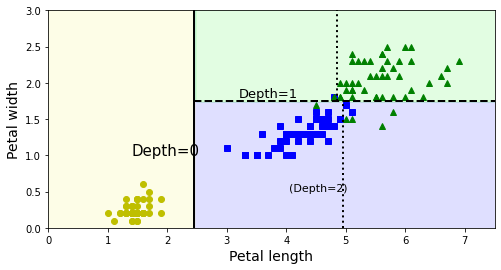

In [28]:
# Plot DT decision boundaries
# Depth=0: root node (petal length=2.45cm)
# Depth=1: right node splits @ 1.75cm
# Stops at max_depth = 2.
# Vertical dotted line shows boundary if max_depth set = 3.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

#save_fig("decision_tree_decision_boundaries_plot")
plt.show()

## Estimating Class Probabilities

In [29]:
# Probability of instance 5cm long, 1.5cm wide belonging to any one of three nodes above:
print(tree_clf.predict_proba([[5, 1.5]]))

# Return class of highest probability (in this case, class #1.)
print(tree_clf.predict([[5, 1.5]]))

[[0.         0.90740741 0.09259259]]
[1]


## CART (Classification and Regression Tree)
* splitting the training set into two subsets using a single feqture *k* and a threshold $t_{k}$
* searches for the pair(k,$t_{k}$) that produces the purest subset(weighted by their size)
* CART cost function for classification
$J(k,t_{k}) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$<br />
where \begin{cases}
G_{left/right} \text{measures the impurity of the left/right subset}\\
m_{left/right} \text{is the number of instances in the left/right subset}
\end{cases}

* CART algorithm is a greedy algorithm : it doesn't check if the split will lead to the lowest posdible impurity several lefels down
* A greedy algorithm often produces a resonably good solution but not guaranteed to be optimal

## Computational Complexity
* the Decision Trees requires going through roubhly $O(log_{2}(m))$ nodes 

## Gini Impurity or Entropy
* Gini impurity by default
* can select "entropy" impurity measure by setting the *criterion* hyperparameter
* A set's entropy is zero when it contains instances of only one class.
* Gini impurity
$G_{i} = 1-\sum_{k=1}^{n}p_{i,k}^2$
* Entropy
$H_{i} = -\sum_{\substack{{k=1}\\p_{i,k}&\neq0}}^{n}log_{2}(p_{i,k})$
* Gini impurity is slightly faster to compute
* Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

## Regularisation hyperparameters
* max_depth(the default is none, which means unlimited) - will regularise the model and thus reduce the risk of overfitting
* min_samples_split, min_samples_leaf, min_weight_fraction_leaf, min_sample_leaf, max_leaf_nodes, max_features
* increasing min_ hyperparameters or reducing max_ hyperparameters will regularise the model

<ipython-input-28-c9472b106732>:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
<ipython-input-28-c9472b106732>:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)


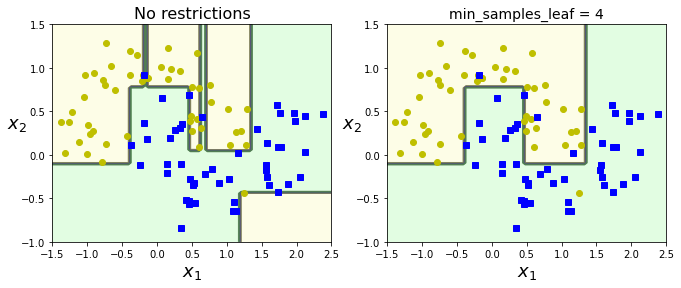

In [30]:
# Train two DTs on moons dataset.
# left: default params = no restrictions (case of overfitting)
# right: min_samples_leaf = 4. (better generalization)

from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

#save_fig("min_samples_leaf_plot")
plt.show()

## Regression
* instead of predicting a class in each node, it predicts a value
* the predicted value for each region is always the average target value of the instances in that region
* the algorithm splits each region in a way that makes most training instances as close as possible to that predicted value.
* CART : instead of trying to split the training set in a way that minimises impurity, it now tries to split the training set in a way that minimises the MSE.
* CART cost function for Regression
$J(k,t_{k}) = \frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$<br />
where \begin{cases}
MSE_{node}= \sum_{i	\subseteq node}(\hat{y}_{node} - y^{(i)})^2\\
\hat{y}_{node} =  \frac{1}{m_{node}}\sum_{i	\subseteq node}y^{(i)}
\end{cases}

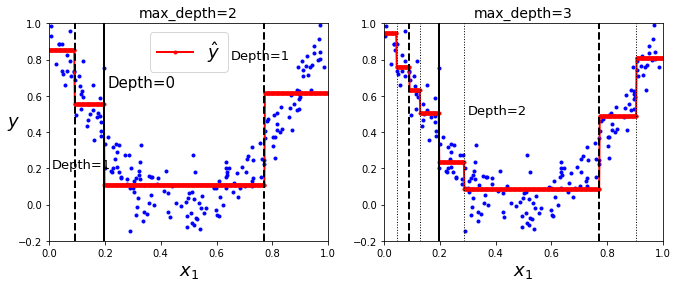

In [31]:
from sklearn.tree import DecisionTreeRegressor

# Quadrat!ic training set + noise
rnd.seed(42)
m = 200
X = rnd.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + rnd.randn(m, 1) / 10

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

# Predicted value for each region (red line) = avg target value of instances in that region.

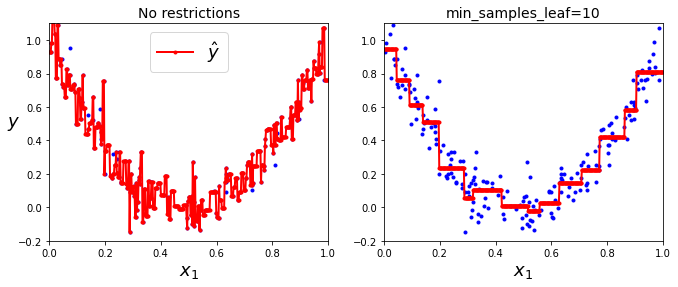

In [32]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

#save_fig("tree_regression_regularization_plot")
plt.show()

# left: no regularization (default params): overfitting
# right: more reasonable.

## Instability
* Decision Trees love orthogonal decision boundaries(all splits are perpendicular to an axis) which makes them sensitive to training set rotation
* Very sensitive to small variations in the training data

<ipython-input-28-c9472b106732>:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
<ipython-input-28-c9472b106732>:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)


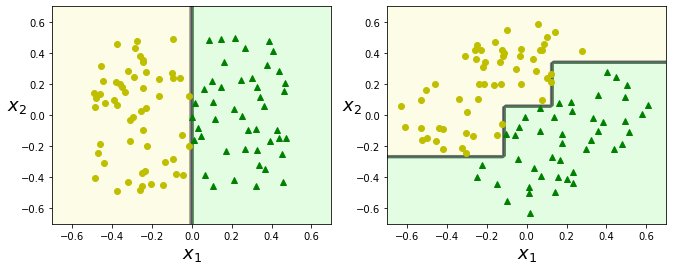

In [33]:
rnd.seed(6)
Xs = rnd.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array(
    [[np.cos(angle), -np.sin(angle)], 
     [np.sin(angle), np.cos(angle)]])

Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

#save_fig("sensitivity_to_rotation_plot")
plt.show()

# left: std linearly separable dataset
# right: dataset rotated by 45degrees.